In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
import seaborn as sns

1.Take the PoliceKillingUS Dataset.

In [3]:
data=pd.read_csv('D:\datas\PoliceKillingsUS.csv',encoding='latin1')

In [4]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
data.shape

(2535, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


2. Perform DataCleaning using SimpleImputer, LogisticRegression techniques

In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data['armed'].value_counts()

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
pen                                    1
glass shard                            1
stapler                                1
baseball bat and fireplace poker       1
crowbar                                1
Name: armed, Length: 68, dtype: int64

In [9]:
cat_cols=[]
for col in data.select_dtypes('object'):
    if col!='name':
        data[col]=data[col].astype('category')
        cat_cols.append(col)

In [10]:
cat_cols

['manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [11]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [12]:
SI_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)

In [13]:
for col in cat_cols:
    if data[col].isnull().sum()!=0:
        data[col]=SI_cat.fit_transform(data[[col]])

In [14]:
SI_num=SimpleImputer(missing_values=np.nan, strategy='median', copy=False)

In [15]:
data['age']=SI_num.fit_transform(data[['age']])

3.a)Top 10 cities which have most number of fatal shootings

In [16]:
data['city'].value_counts().nlargest(10)

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

3.b)Age group of people killed along with reasons why were they killed and how were they killed

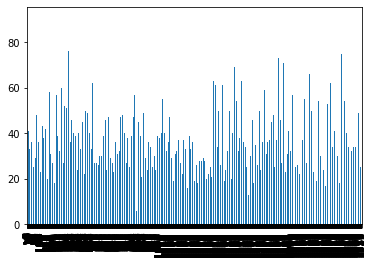

In [17]:
data['age'].plot(kind='bar')

In [18]:
data['age'].describe()

count    2535.000000
mean       36.526233
std        12.839056
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [19]:
bins=[0,10,18,30,40,50,100]
labels=['Child','teens','twenties','thirties', 'forties', 'old']
data['Age_group']=pd.cut(data.age, bins=bins, labels=labels)

In [20]:
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,old
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,forties
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,twenties
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,thirties
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,thirties
5,11,Kenneth Joe Brown,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,teens
6,13,Kenneth Arnold Buck,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,twenties
7,15,Brock Nichols,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,thirties
8,16,Autumn Steele,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,thirties
9,17,Leslie Sapp III,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,forties


In [21]:
age_shots=pd.crosstab(data['Age_group'],data['manner_of_death'])
age_shots

manner_of_death,shot,shot and Tasered
Age_group,,
Child,1,0
teens,97,7
twenties,774,48
thirties,725,57
forties,389,36
old,377,24


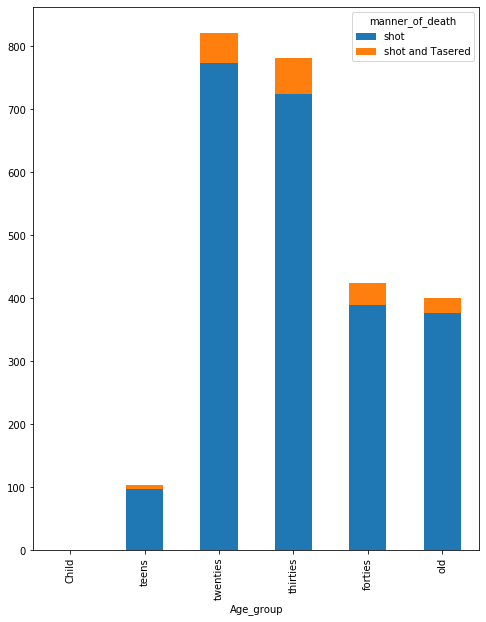

In [22]:
age_shots.plot(kind='bar', stacked=True, legend=True, figsize=(8,10))
plt.show()

3.c)Visualize geographic locations using plotly

4.Perform Label Encoding.

In [23]:
data['state'].nunique()

51

In [36]:
n=data['state'].value_counts()

In [37]:
vals=n[:22].index
print (vals)

CategoricalIndex(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO',
                  'WA', 'IL', 'TN', 'LA', 'NM', 'PA', 'AL', 'VA', 'NY', 'SC',
                  'KY', 'IN'],
                 categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', ...], ordered=False, dtype='category')


In [38]:
data['state']=data.state.where(data.state.isin(vals),'other')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  """Entry point for launching an IPython kernel.


In [39]:
data['state'].nunique()

23

In [42]:
np.cumsum(data['city'].value_counts().nlargest(100))

Los Angeles     39
Phoenix         70
Houston         97
Chicago        122
Las Vegas      143
              ... 
Chico          835
Antioch        839
Rapid City     843
Cleveland      847
Huntsville     851
Name: city, Length: 100, dtype: int64